## Introdução

Este caderno tem como objetivo analisar dados **fictícios** de vendas de alguns produtos da loja ZARA. Os dados são uma combinação entre produtos retirados do site da marca com dados de vendas de outra loja, que leva em conta o posicionamento dos itens entre três categorias: 
- **Aisle:** chamaremos de **Corredor**;
- **End-cap:** chamaremos de **Frente do corredor**;
- **Front of Store:** chamaremos de **Frente da loja**;

Fonte dos dados: https://www.kaggle.com/datasets/xontoloyo/data-penjualan-zara/data

Mesmo sendo dados simulados, iremos considerar para a análise que os dados são reais e referentes a vendas de N lojas da marca em uma determinada região. 

Vamos ao entendimento dos dados antes de formularmos algumas perguntas a serem respondidas.

## Descrição dos Dados I

Temos na base original os seguintes dados:

| Nome da variável | Tipo | Descrição | 
| --- | --- | --- |
|Product ID | int64 | ID único do produto |
|Product Position|  object | Posição do produto, pode ser: **Aisle**, **End-cap** ou **Front of Store**
|Promotion | object | Se o produto está em promoção ou não |
|Product Category| object | A categoria do produto |
|Seasonal| object | Se o produto é sazonal ou não |
|Sales Volume| int64 | O volume de vendas do produto |
|brand| object | A marca do produto |
|url| object | A url do produto no site da ZARA (de onde as informações do produto foram retiradas |
|sku| object | *Stock Keeping Unit*, código único para identificar itens disponíveis para venda |
|name| object | Nome do produto |
|description| object | Breve descrição do produto |
|price| float64 | Preço do produto |
|currency| object | Moeda do preço do produto |
|scraped_at|  object | Quando o dado foi obtido |
|terms| object | Os termos que identificam um produto. Pode ser visto também como uma tag |
|section| object | A seção do produto, que pode ser Masculina (MAN) ou Feminina (Woman) |

No entanto, alguns itens não serão utilizados e outros precisarão ser criados. Por isso, nos próximos passos, faremos esse tratamento e atualizaremos a descrição dos dados utilizados.

Vamos seguir para a definição de um escopo do que queremos atingir com essa análise.

## Objetivos da Análise:

Com certeza temos muitas informações que podem ser retiradas dos dados que possuímos. No entanto, vamos focar em alguns objetivos para termos uma análise mais sucinta e robusta. Para isso, vamos responder algumas perguntas ao longo do processo, que podem ser de grande relevância e utilidade para a empresa:

- Qual o faturamento total da loja nesse período analisado?
- Quais são os produtos mais e menos vendidos?
- Quais são as categorias mais e menos vendidas?
- Qual a seção mais vendida?
- Produtos sazonais vendem mais ou menos do que não sazonais? Qual rende mais?
- Qual o melhor posicionamento de um produto para vendas hoje?
- Seria possível melhorar o faturamento alterando o posicionamento de algum produto?
- Existe alguma outra oportunidade de aumentar o faturamento que não estamos percebendo?

Com essas perguntas em mente, seremos capazes de guiar nossa análise a fim de trazer valor para a empresa.

## Limpeza e Tratamento dos Dados

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Leitura dos Dados

In [2]:
zara = pd.read_csv('zara.csv', delimiter=';')

### Limpeza dos Dados

In [3]:
# Checking for any null values
zara[zara.isna().any(axis=1)]

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [4]:
# By using the product url, we were able to complete missing values:
zara.loc[60, 'description'] = 'Leather jacket with vintage effect finish. Rib collar and long sleeves. Welt pockets at hip and interior pocket. Rib trim. Front zip closure.'
zara.loc[72, 'name'] = 'WAXED EFFECT JACKET'
zara.loc[72, 'description'] = 'Jacket made of cotton fabric with a waxed finish. Contrast fabric lapel collar. Long sleeves with snap button cuffs. Zip pocket at chest and pockets at side hip. Front zip closure.'

# Now let's remove the variables we won't need: brand, currency and Product Category are always the same and we don't need the scraped_at for now.
zara_main = zara.drop(columns=['scraped_at', 'brand', 'currency', 'Product Category'])

# Now let's rename the remaining columns to remove blank spaces and standardize them
zara_main = zara_main.rename(columns={
    'Product ID': 'product_id', 
    'Product Position': 'product_position', 
    'Promotion': 'promotion',
    'Seasonal': 'seasonal',
    'Sales Volume': 'sales_volume'
})

zara_main

,product_id,product_position,promotion,seasonal,sales_volume,url,sku,name,description,price,terms,section
0,185102,Aisle,No,No,2823,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,jackets,MAN
1,188771,Aisle,No,No,654,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,jackets,MAN
2,180176,End-cap,Yes,Yes,2220,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,jackets,MAN
3,112917,Aisle,Yes,Yes,1568,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,jackets,MAN
4,192936,End-cap,No,Yes,2942,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,jackets,MAN
...,...,...,...,...,...,...,...,...,...,...,...,...
247,159182,Front of Store,Yes,No,1014,https://www.zara.com/us/en/basic-100-wool-swea...,321993245-500-2,FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,Jacket made of technical fabric with padded in...,169.00,jackets,MAN
248,199233,Aisle,Yes,No,2222,https://www.zara.com/us/en/colorblock-knit-cro...,330590505-500-2,CONTRASTING PATCHES BOMBER JACKET,Oversized jacket. Notched lapel collar and lon...,159.00,jackets,MAN
249,137044,Aisle,No,Yes,2534,https://www.zara.com/us/en/hooded-technical-ja...,320680326-107-39,PATCH BOMBER JACKET,Varsity jacket with elastic collar and long sl...,12.99,jackets,MAN
250,154736,Front of Store,Yes,Yes,1466,https://www.zara.com/us/en/houndstooth-suit-ja...,311292244-800-39,CROPPED BOMBER JACKET LIMITED EDITION,Varsity jacket with padded interior. Rib elast...,19.90,jackets,MAN


### Tratamento dos Dados

Considerando as perguntas que queremos responder, parece fazer sentido criarmos uma nova variável com o total do faturamento de cada produto, a fim de agilizar nosso processamento:

In [5]:
zara_main['total_earnings'] = zara_main['sales_volume'] * zara_main['price']

Além disso, temos alguns termos em inglês, como o posicionamento dos produtos (Aisle, End of Cap e Front of Store) e os termos ou tags dos produtos (jackets, shoes, t-shirt, etc). Vamos transformar esses dados para português para facilitar nossa comunicação ao longo do documento:

In [6]:
zara_main['product_position'] = zara_main['product_position'].replace({'Aisle': 'Corredor', 'End-cap': 'Frente do corredor', 'Front of Store': 'Frente da loja'})
zara_main['terms'] = zara_main['terms'].replace({'jackets': 'jaquetas', 'sweaters': 'suéteres', 't-shirts': 'camisetas', 'shoes': 'sapatos'})

## Descrição dos Dados II

Após as limpezas e tratamentos efetuados, trabalharemos então os seguintes dados: 

| Nome da variável | Tipo | Descrição | 
| --- | --- | --- |
| product_id | int64 | ID único do produto |
| product_position |  object | Posição do produto, pode ser: **Corredor**, **Frente do corredor** ou **Frente da loja**
| promotion | object | Se o produto está em promoção ou não |
| seasonal | object | Se o produto é sazonal ou não |
| sales_volume | int64 | O volume de vendas do produto |
| url | object | A url do produto no site da ZARA (de onde as informações do produto foram retiradas |
| sku | object | *Stock Keeping Unit*, código único para identificar itens disponíveis para venda |
| name | object | Nome do produto |
| description | object | Breve descrição do produto |
| price | float64 | Preço do produto, em **dólar** |
| terms | object | Os termos que identificam um produto. Pode ser visto também como uma tag identificadora |
| section | object | A seção do produto, que pode ser Masculina (MAN) ou Feminina (Woman) |
| total_earnings | float64 | Faturamento total com as vendas do produto (em **dólar**), ou simplesmente *sales_volume* * *price* |

## Análise dos Dados

### Vendas e faturamento no período

Vamos começar nossa análise com os dados referentes a faturamento e volume de vendas.

In [7]:
# Function to draw a custom pie chart with given dataframe
def get_pie_chart(df, groupby, selected_column, is_value_currency, title, ax, currency_format='BR', figsize=(10, 8), loc='lower left'):
    grouped_column_sum = zara_main.groupby(groupby)[selected_column].sum().sort_values(ascending=False)

    grouped_column_values_transformed = []
    for column_value in grouped_column_sum:
        # BR currency format:
        if(is_value_currency):
            if currency_format == 'BR':
                transformed_selected_column_value = '${:,.2f}'.format(column_value).replace(',', 'w').replace('.', ',').replace('w','.')
            else: 
            # If US currency format is needed:
                transformed_product_total_earnings = '${:,.2f}'.format(column_value)
        else:
            transformed_selected_column_value = '{:,}'.format(column_value).replace(',', '.')
        
        grouped_column_values_transformed.append(transformed_selected_column_value)

    # List of the same length of the labels, to explode the first element in the chart (the bigger one)
    explode_list = [0] * len(grouped_column_sum)
    explode_list[0] = 0.1

    ax.pie(grouped_column_sum, autopct='%1.1f%%', labels=grouped_column_sum.keys(), explode=explode_list)
    ax.set_title(title)
    ax.legend(grouped_column_values_transformed, loc=loc)


Primeiro, vamos à informação mais relevante dessa base de dados: qual a distribuição de faturamento e volume de vendas entre os posicionamentos dos produtos nas lojas:

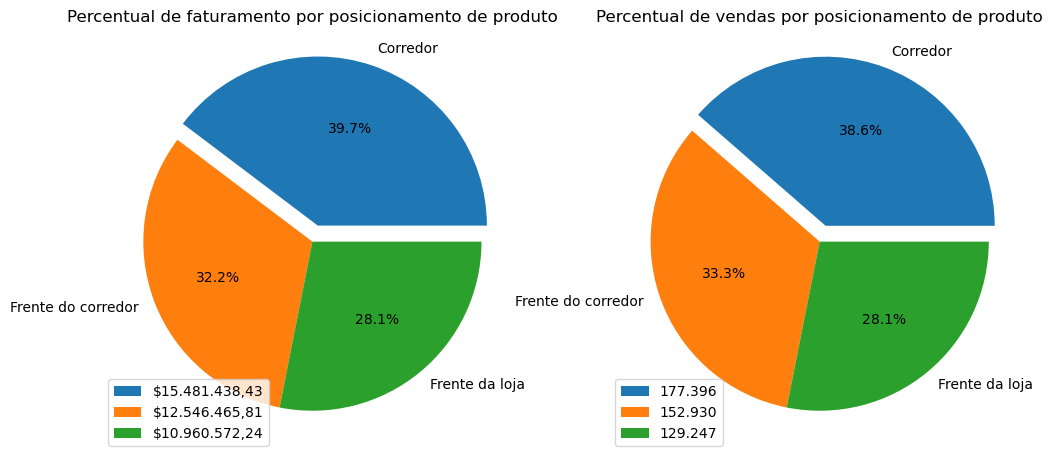

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

get_pie_chart(
    df=zara_main, 
    groupby='product_position', 
    selected_column='total_earnings',  
    is_value_currency=True,
    title='Percentual de faturamento por posicionamento de produto',
    figsize=(5,6),
    ax=axs[0]
)

get_pie_chart(
    df=zara_main, 
    groupby='product_position', 
    selected_column='sales_volume',  
    is_value_currency=False,
    title='Percentual de vendas por posicionamento de produto',
    figsize=(5,6),
    ax=axs[1]
)


Pelos gráficos acima vemos que o maior faturamento e número de vendas ocorre nos **Corredores**, embora esse valor seja apenas 7,5% maior no faturamento e 5,3% maior no volume de vendas comparado à **Frente do corredor**.

Infelizmente não temos informações sobre a capacidade de alocação de produtos em cada um desses locais nas lojas analisadas, mas se tivéssemos, seria possível verificar com mais profundidade qual a real relevância de cada um desses pontos para vendas de produtos.

Embora não tenhamos esses dados e nem detalhamento do layout das lojas, é coerente deduzir, pela própria definição, que os corredores possuem uma capacidade significativamente maior do que as frentes de um corredor, no mínimo 20% a 30% maior. Com isso, verificamos uma grande oportunidade de vendas nesses pontos, já que as vendas foram apenas 5,3% menores, mas com uma capacidade de 20% a 30% menor.

Esse fato é corroborado por outras pesquisas e está descrito em mais detalhes neste post de uma empresa especializada em consultoria para fornecedores parceiros do Walmart: https://www.8thandwalton.com/blog/end-cap/. Ela afirma que as frentes dos corredores são excelentes pontos para acelerar vendas de produtos pois os destaca dos demais. São muito utilizados em campanhas promocionais e sazonais e funcionam muito bem quando existe comunicação entre os produtos expostos.

Com isso em mente, iremos mais adiante verificar se estamos utilizando esses posicionamentos da melhor forma, a fim de otimizar as vendas nas lojas.

Por fim, apenas por questões informativas, temos:
- **Faturamento total** dessas lojas no período analisado: US$ 38.988.476,48
- **Volume total de vendas:** 459.573 unidades

Podemos perceber também que a distribuição do volume de vendas por posição do produto se assemelha muito à distribuição do faturamento total por posição do produto. Isso parece indicar que os produtos vendidos em cada setor possuem basicamente o mesmo valor, na média. Vamos verificar essa informação:

In [9]:
product_position_price_stats = zara_main.groupby('product_position')['price'].agg(['mean', 'std', 'median', 'max', 'min', pd.Series.mode])
product_position_price_stats

,mean,std,median,max,min,mode
product_position,,,,,,
Corredor,88.785773,55.748359,79.9,349.0,9.99,69.9
Frente da loja,88.893478,58.543921,89.9,439.0,7.99,89.9
Frente do corredor,81.276395,41.476492,69.9,299.0,12.99,69.9


Constatamos que sim, os valores dos produtos vendidos por posição na loja são, em média, muito parecidos. 

Já conseguimos observar que produtos da Frente do corredor possuem ticket médio menor do que os produtos em outras posições, o que já parece ser um indicador do bom uso desse posicionamento, pois como destacamos, produtos promocionais nesses locais tendem a destacar-se mais e impulsionar mais as vendas do que em outros locais.

Vamos agora analisar o faturamento e volume de vendas por categorias de produtos:

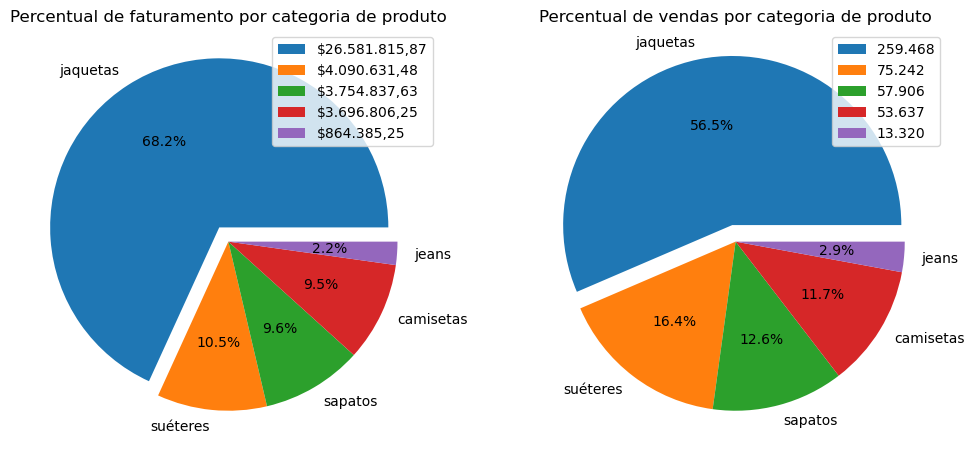

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

get_pie_chart(
    df=zara_main, 
    groupby='terms', 
    selected_column='total_earnings',  
    is_value_currency=True,
    title='Percentual de faturamento por categoria de produto',
    figsize=(5,6),
    loc='upper right',
    ax=axs[0]
)

get_pie_chart(
    df=zara_main, 
    groupby='terms', 
    selected_column='sales_volume',  
    is_value_currency=False,
    title='Percentual de vendas por categoria de produto',
    loc='upper right',
    figsize=(5,6),
    ax=axs[1]
)

Podemos verificar que jaquetas são campeãs de vendas tanto em faturamento quanto no número de vendas. Além disso, são o produto mais rentável da marca, pois 56,5% das vendas totais e que são de jaquetas, correspondem a 68,2% do faturamento total.

Continuando na análise de categorias de produtos, vamos agora verificar o volume de vendas e faturamento total por categoria de produto para cada posicionamento possível na loja:

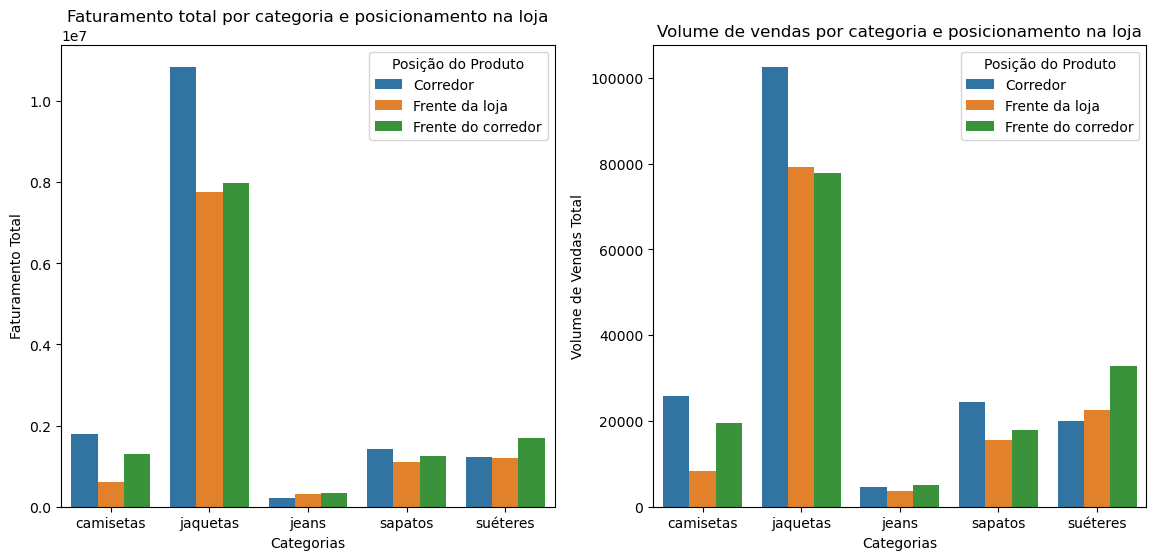

In [11]:
zara_main_categories_and_position_agg = zara_main[['product_position', 'sales_volume', 'total_earnings', 'terms']].groupby(['terms', 'product_position'], as_index=False).agg('sum')

fig, axs = plt.subplots(ncols=2, figsize=(14, 6))

sns.barplot(data=zara_main_categories_and_position_agg, x='terms', y='total_earnings', hue='product_position', ax=axs[0])
axs[0].set_title('Faturamento total por categoria e posicionamento na loja');
axs[0].legend(title='Posição do Produto')
axs[0].set(xlabel='Categorias', ylabel='Faturamento Total')

sns.barplot(data=zara_main_categories_and_position_agg, x='terms', y='sales_volume', hue='product_position', ax=axs[1])
axs[1].set_title('Volume de vendas por categoria e posicionamento na loja');
axs[1].legend(title='Posição do Produto')
axs[1].set(xlabel='Categorias', ylabel='Volume de Vendas Total');

Podemos observar que algumas informações se destacam:
- As jaquetas vendidas em corredores superam em aproximadamente 30% o volume de vendas de jaquetas em outras posições.
- O volume de vendas de camisetas na frente da loja é 3 vezes menor do que em corredores e 2,3 vezes menor do que na frente de corredores.
- O maior número de vendas de suéteres ocorre na frente dos corredores, com aproximadamente 45% mais vendas do que na frente da loja e 63% mais vendas do que nos corredores. No entanto, o faturamento nessa posição é apenas 41% superior à frente da loja e 39% maior do que os corredores. Mais uma vez observamos um possível indicativo de uso de preços menores nas frentes de corredores.

Vamos agora verificar como a média do volume de vendas e do faturamento total se comportam por categoria de produto e posicionamento na loja:

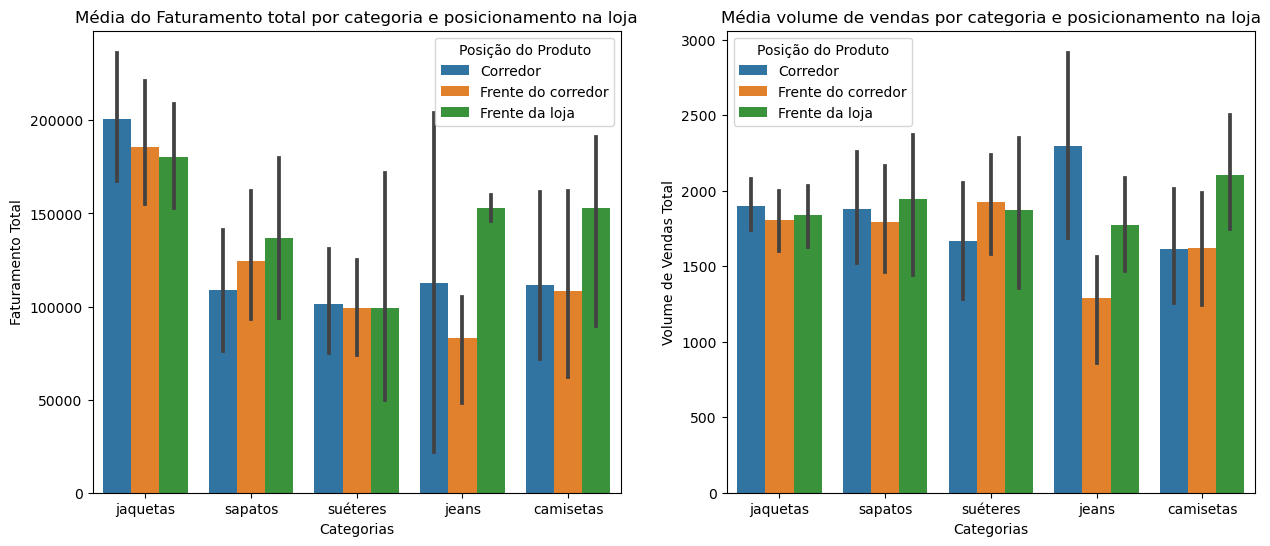

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

sns.barplot(data=zara_main, x='terms', y='total_earnings', hue='product_position', ax=axs[0])
axs[0].set_title('Média do Faturamento total por categoria e posicionamento na loja');
axs[0].legend(title='Posição do Produto')
axs[0].set(xlabel='Categorias', ylabel='Faturamento Total')

sns.barplot(data=zara_main, x='terms', y='sales_volume', hue='product_position', ax=axs[1])
axs[1].set_title('Média volume de vendas por categoria e posicionamento na loja');
axs[1].legend(title='Posição do Produto')
axs[1].set(xlabel='Categorias', ylabel='Volume de Vendas Total');

Analisando os gráficos acima, vemos pelo intervalo de confiança que não existe uma diferença estatisticamente significante entre nenhum dos três posicionamentos possíveis dentro da loja, quando consideramos as médias de cada categoria de produto. Ou seja, o posicionamento dos itens não parece ser estatisticamente relevante no que diz respeito a valores absolutos de volume de vendas e faturamento total quando comparamos produtos dentro de uma mesma categoria, e portanto podem ser colocados em qualquer local que o resultado será provavelmente semelhante ao analisado.

Esse comportamento, no entanto, não nos traz uma informação muito precisa, pois como exposto anteriormente, não temos dados da capacidade de vendas de cada um desses setores. Colocar um produto em um setor específico pode não fazer tanta diferença no volume total de vendas quando comparado com outros setores, porém não temos dados para definir qual o comportamento quando consideramos a capacidade de cada setor. Ou seja, é possível (e bastante provável, pela nossa análise anterior) que vejamos diferenças no percentual de vendas de cada setor com relação à sua capacidade máxima.

A única categoria de produtos que salta aos olhos nos gráficos são os jeans, que pelo que os dados indicam, parecem ser vendidos em maior volume e com maior média de faturamento na **frente da loja**, quando comparamos com a **frente de um corredor**. O volume de vendas médio de jeans em um **corredor** também parece ser estatisticamente maior do que na **frente de um corredor**, embora não se possa afirmar o mesmo com relação ao faturamento.

Ou seja, quando houver dúvidas no posicionamento de peças de jeans, pode ser uma boa ideia priorizar a frente da loja e os corredores a fim de aumentar o faturamento e volume das vendas desses produtos.

É importante notar que não podemos afirmar com tanta certeza que as vendas de jeans são melhores nesses locais, porque como mencionado, não temos os percentuais de produtos vendidos nem a capacidade total em cada uma dessas posições. Ou seja, pode ser que o volume e o faturamento das vendas nesses locais tenha sido maior simplesmente porque a capacidade deles é maior.

Continuando nossa análise, vamos verificar como ocorre a distribuição de vendas e faturamento para as duas seções possíveis:

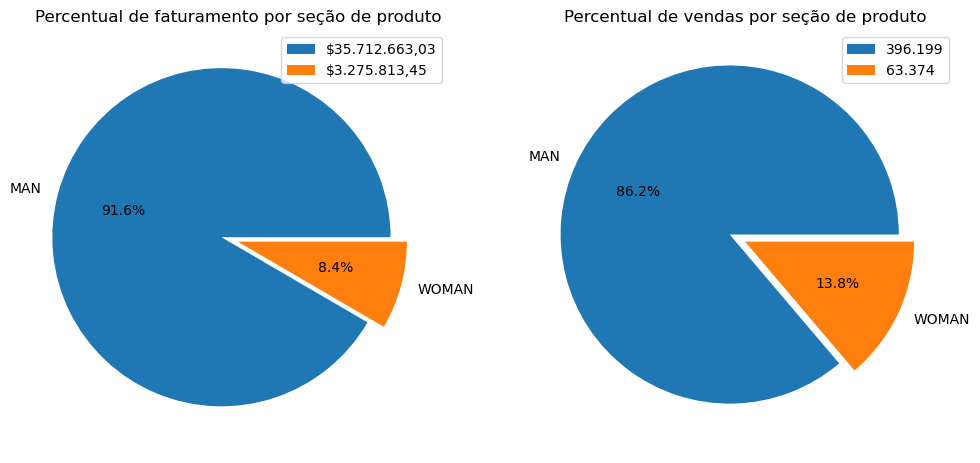

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

get_pie_chart(
    df=zara_main, 
    groupby='section', 
    selected_column='total_earnings',  
    is_value_currency=True,
    title='Percentual de faturamento por seção de produto',
    loc='upper right',
    figsize=(6, 4),
    ax=axs[0]
)

get_pie_chart(
    df=zara_main, 
    groupby='section', 
    selected_column='sales_volume',  
    is_value_currency=False,
    title='Percentual de vendas por seção de produto',
    loc='upper right',
    figsize=(6, 4),
    ax=axs[1]
)

Percebemos que a loja é mais focada em produtos masculinos. Além disso, os produtos masculinos vendidos são mais rentáveis, pois com 86,2% das vendas, são responsáveis por 91,6% do faturamento.

Vamos analisar a média do faturamento e do volume de vendas por categoria e seção:

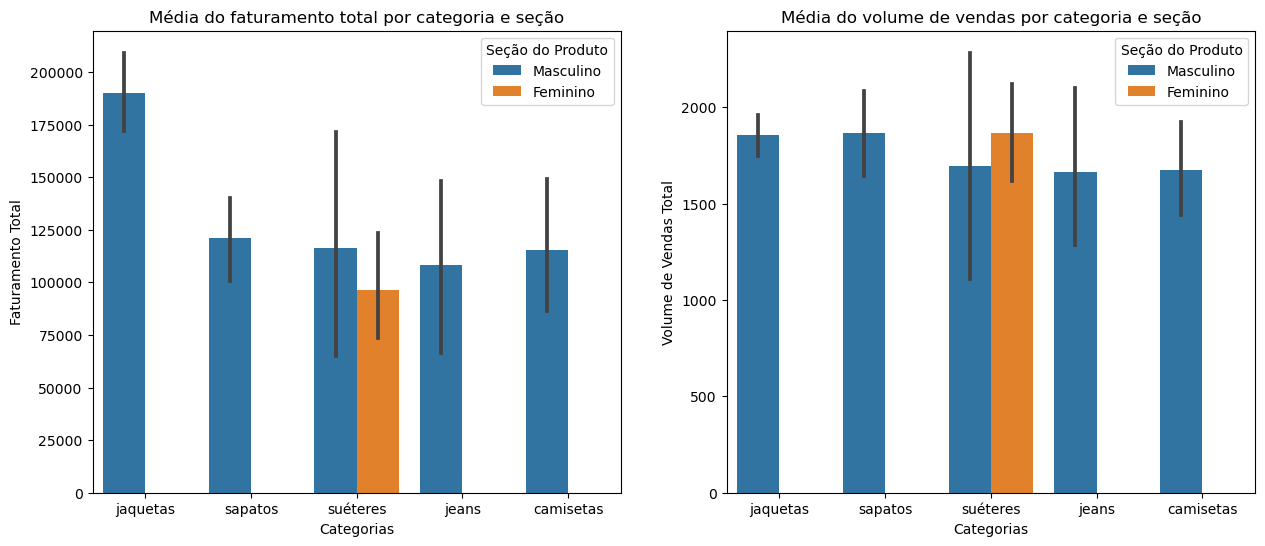

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

g = sns.barplot(data=zara_main, x='terms', y='total_earnings', hue='section', ax=axs[0])
h, l = g.get_legend_handles_labels()
axs[0].set_title('Média do faturamento total por categoria e seção');
axs[0].legend(handles=h, title='Seção do Produto', labels=['Masculino', 'Feminino'], loc='upper right')
axs[0].set(xlabel='Categorias', ylabel='Faturamento Total')

g = sns.barplot(data=zara_main, x='terms', y='sales_volume', hue='section', ax=axs[1])
h, l = g.get_legend_handles_labels()
axs[1].set_title('Média do volume de vendas por categoria e seção');
axs[1].legend(handles=h, title='Seção do Produto', labels=['Masculino', 'Feminino'])
axs[1].set(xlabel='Categorias', ylabel='Volume de Vendas Total');

Podemos observar que na amostra selecionada, os produtos da seção feminina estão focados apenas nos suéteres. Além disso, possuem um número maior de vendas na média, enquanto o faturamento é menor na média, embora essa diferença não seja estatisticamente significante.

Vamos verificar agora as vendas por produtos sazonais:

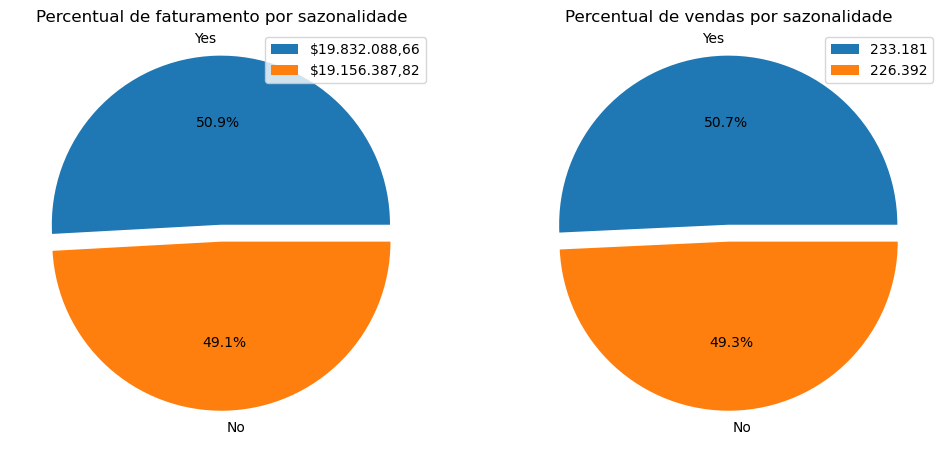

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

get_pie_chart(
    df=zara_main, 
    groupby='seasonal', 
    selected_column='total_earnings',  
    is_value_currency=True,
    title='Percentual de faturamento por sazonalidade',
    loc='upper right',
    figsize=(6, 4),
    ax=axs[0]
)

get_pie_chart(
    df=zara_main, 
    groupby='seasonal', 
    selected_column='sales_volume',  
    is_value_currency=False,
    title='Percentual de vendas por sazonalidade',
    loc='upper right',
    figsize=(6, 4),
    ax=axs[1]
)

A sazonalidade não parece ter impacto significativo na quantidade de vendas nem no faturamento.

Vamos analisar a média do faturamento e do volume de vendas por categoria e sazonalidade:

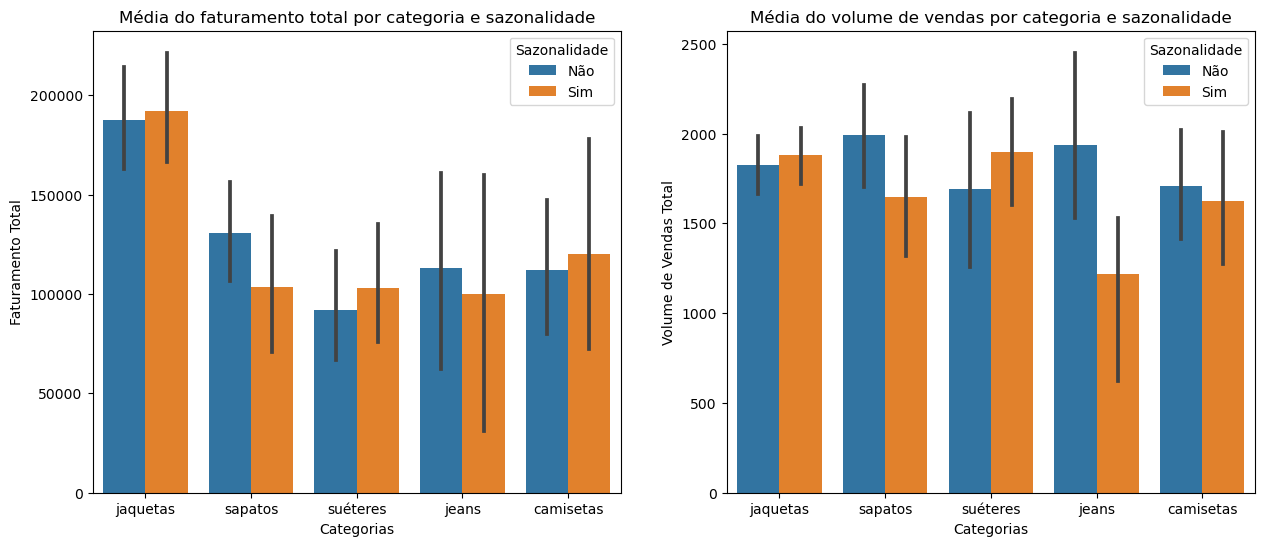

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

g = sns.barplot(data=zara_main, x='terms', y='total_earnings', hue='seasonal', ax=axs[0])
h, l = g.get_legend_handles_labels()
axs[0].set_title('Média do faturamento total por categoria e sazonalidade');
axs[0].legend(handles=h, title='Sazonalidade', labels=['Não', 'Sim'])
axs[0].set(xlabel='Categorias', ylabel='Faturamento Total')


g = sns.barplot(data=zara_main, x='terms', y='sales_volume', hue='seasonal', ax=axs[1])
h, l = g.get_legend_handles_labels()
axs[1].set_title('Média do volume de vendas por categoria e sazonalidade');
axs[1].legend(handles=h, title='Sazonalidade', labels=['Não', 'Sim'])
axs[1].set(xlabel='Categorias', ylabel='Volume de Vendas Total');

Não parece haver nenhuma diferença estatisticamente significativa quando consideramos itens sazonais em cada categoria. A exceção ocorre  nos jeans, que possuem um volume de vendas maior quando os produtos não são sazonais. O faturamento, no entanto, permanece estatisticamente semelhante.

Vamos aproveitar para checar se os produtos sazonais estão sendo posicionados preferencialmente na frente dos corredores, a fim de aproveitar uma das vantagens desse posicionamento:

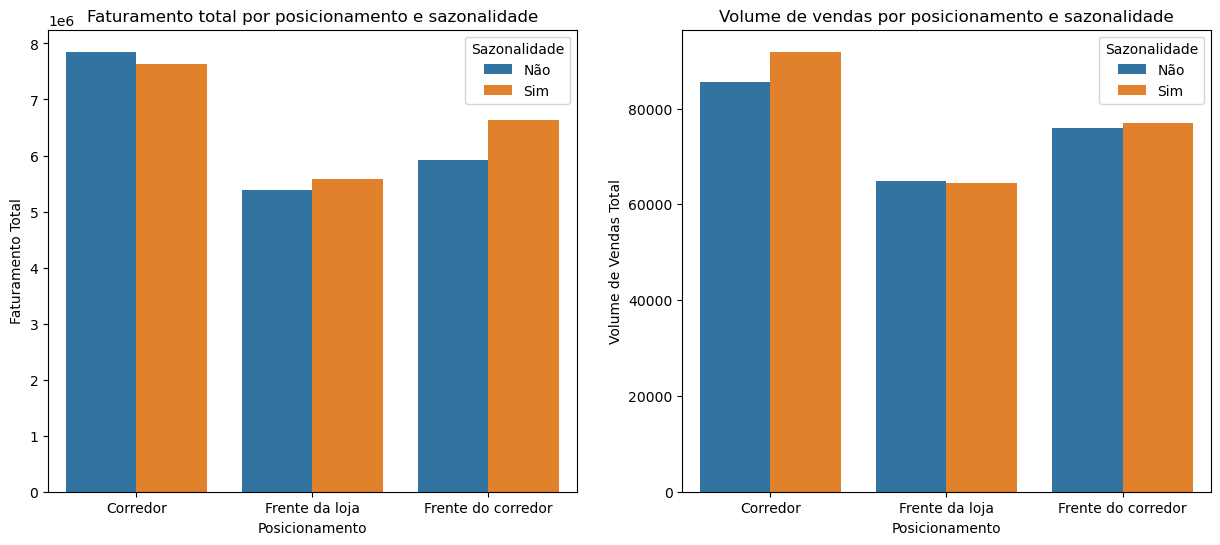

In [19]:
zara_main_categories_and_position_agg = zara_main[['product_position', 'sales_volume', 'total_earnings', 'seasonal']].groupby(['seasonal', 'product_position'], as_index=False).agg('sum')

fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

g = sns.barplot(data=zara_main_categories_and_position_agg, x='product_position', y='total_earnings', hue='seasonal', ax=axs[0])
h, l = g.get_legend_handles_labels()
axs[0].set_title('Faturamento total por posicionamento e sazonalidade');
axs[0].legend(handles=h, title='Sazonalidade', labels=['Não', 'Sim'], loc='upper right')
axs[0].set(xlabel='Posicionamento', ylabel='Faturamento Total')


g = sns.barplot(data=zara_main_categories_and_position_agg, x='product_position', y='sales_volume', hue='seasonal', ax=axs[1])
h, l = g.get_legend_handles_labels()
axs[1].set_title('Volume de vendas por posicionamento e sazonalidade');
axs[1].legend(handles=h, title='Sazonalidade', labels=['Não', 'Sim'], loc='upper right')
axs[1].set(xlabel='Posicionamento', ylabel='Volume de Vendas Total');

Não parece haver uma grande diferença entre o volume de vendas sazonais e não sazonais dos produtos alocados na frente do corredor. Vamos verificar se a outra parcela de produtos nesses locais é de produtos promocionais:

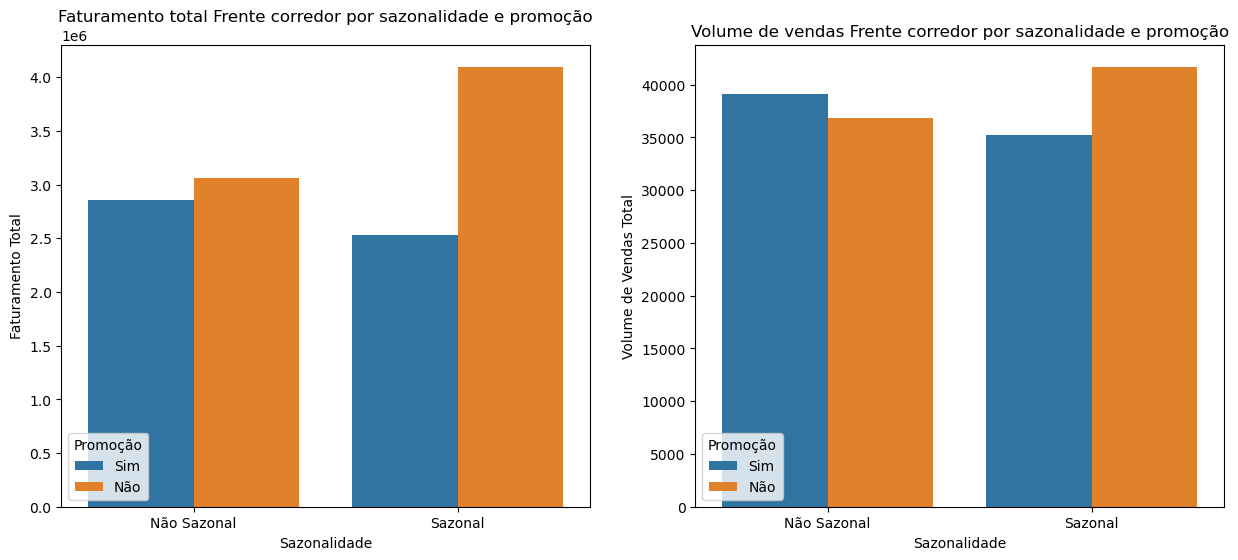

In [20]:
zara_group_end_cap_dist = zara_main[zara_main.product_position == 'Frente do corredor'][['sales_volume', 'total_earnings', 'seasonal', 'promotion']].groupby(['seasonal', 'promotion'], as_index=False).agg('sum')

fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

g = sns.barplot(data=zara_group_end_cap_dist, x='seasonal', y='total_earnings', hue='promotion', ax=axs[0])
h, l = g.get_legend_handles_labels()
axs[0].set_title('Faturamento total Frente corredor por sazonalidade e promoção');
axs[0].legend(handles=h, title='Promoção', labels=['Sim', 'Não'], loc='lower left')
axs[0].set(xlabel='Sazonalidade', ylabel='Faturamento Total')
axs[0].set_xticklabels(['Não Sazonal', 'Sazonal'])

g = sns.barplot(data=zara_group_end_cap_dist, x='seasonal', y='sales_volume', hue='promotion', ax=axs[1])
h, l = g.get_legend_handles_labels()
axs[1].set_title('Volume de vendas Frente corredor por sazonalidade e promoção');
axs[1].legend(handles=h, title='Promoção', labels=['Sim', 'Não'], loc='lower left')
axs[1].set(xlabel='Sazonalidade', ylabel='Volume de Vendas Total')
axs[1].set_xticklabels(['Não Sazonal', 'Sazonal']);

Vemos claramente que sim, a maioria dos produtos alocados nas frentes de corredor são produtos sazonais e promocionais. Apenas em torno de 28% dos produtos não são nem sazonais nem promocionais, o que parece razoável se considerarmos que podem ser produtos novos em uma tentativa de alavancar suas vendas.

Vamos verificar como é essa distribuição nos outros corredores, a fim de comparar os resultados:

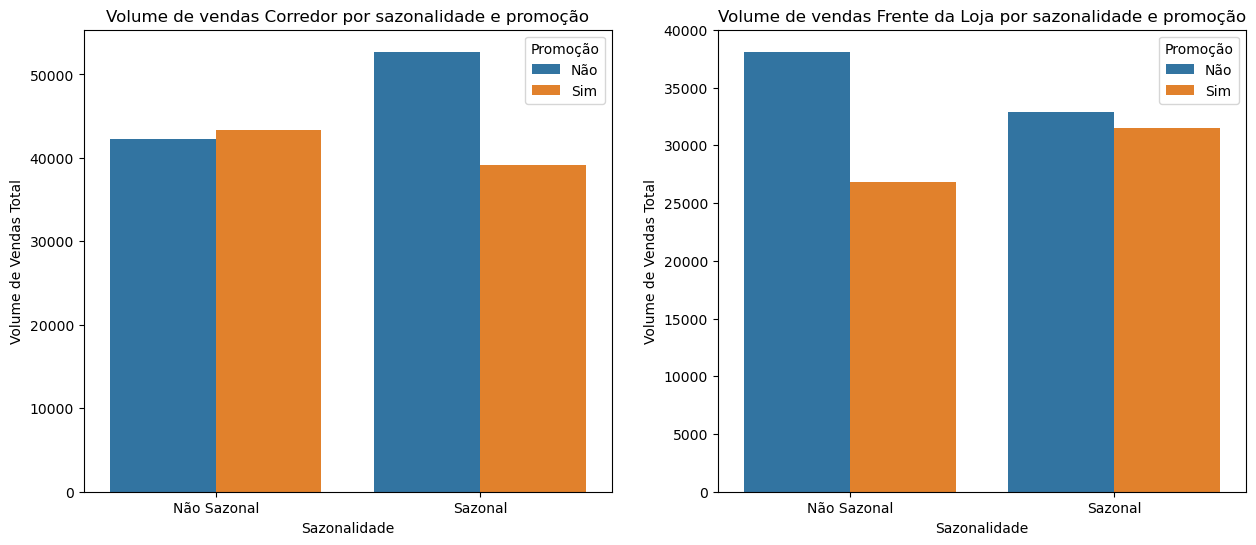

In [21]:
zara_group_aisle_dist = zara_main[zara_main.product_position == 'Corredor'][['sales_volume', 'total_earnings', 'seasonal', 'promotion']].groupby(['seasonal', 'promotion'], as_index=False).agg('sum')
zara_group_front_store_dist = zara_main[zara_main.product_position == 'Frente da loja'][['sales_volume', 'total_earnings', 'seasonal', 'promotion']].groupby(['seasonal', 'promotion'], as_index=False).agg('sum')

fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

g = sns.barplot(data=zara_group_aisle_dist, x='seasonal', y='sales_volume', hue='promotion', ax=axs[0])
h, l = g.get_legend_handles_labels()
axs[0].set_title('Volume de vendas Corredor por sazonalidade e promoção');
axs[0].legend(handles=h, title='Promoção', labels=['Não', 'Sim'])
axs[0].set(xlabel='Sazonalidade', ylabel='Volume de Vendas Total')
axs[0].set_xticklabels(['Não Sazonal', 'Sazonal']);

g = sns.barplot(data=zara_group_front_store_dist, x='seasonal', y='sales_volume', hue='promotion', ax=axs[1])
h, l = g.get_legend_handles_labels()
axs[1].set_title('Volume de vendas Frente da Loja por sazonalidade e promoção');
axs[1].legend(handles=h, title='Promoção', labels=['Não', 'Sim'])
axs[1].set(xlabel='Sazonalidade', ylabel='Volume de Vendas Total')
axs[1].set_xticklabels(['Não Sazonal', 'Sazonal']);

Vemos que nos corredores a distribuição é em torno de 24% de produtos nem sazonais nem promocionais. Esse é um ponto de atenção que requer uma análise mais profunda dos motivos por trás dessa decisão, pois como vimos até aqui, um local para foco de produtos sazonais e promocionais deve ser nos finais dos corredores e não nos corredores.

Já na frente das lojas, cerca de 30% dos produtos não são nem sazonais nem promocionais, o que é mais alinhado com a ideia de concentrar produtos sazonais e promocionais na frente dos corredores. Esse número poderia ser maior, mas é possível que esse posicionamento seja uma estratégia para atrair clientes para entrar nas lojas com produtos do momento e mais baratos.

Após a análise da distribuição de todos os posicionamentos, fica claro que os produtos nos corredores estão desbalanceados com relação aos outros locais, ao levarmos em consideração estudos da área de varejo. 

Vamos agora analisar as médias de faturamento e vendas das categorias comparando itens promocionais, a fim de encerrar essa etapa da análise de categorias:

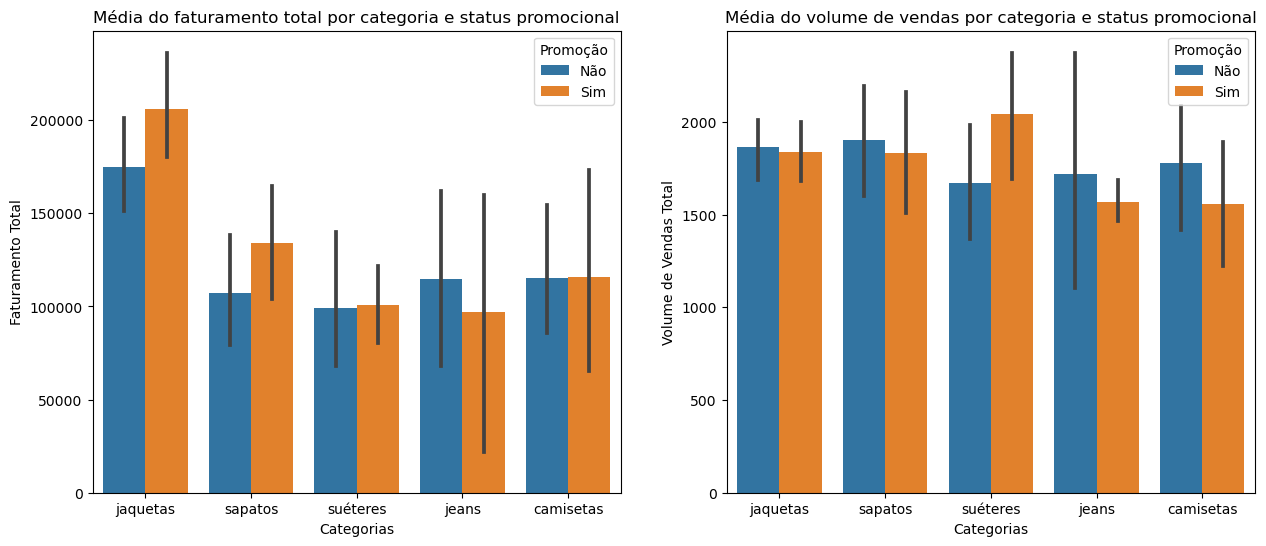

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))

g = sns.barplot(data=zara_main, x='terms', y='total_earnings', hue='promotion', ax=axs[0])
h, l = g.get_legend_handles_labels()
axs[0].set_title('Média do faturamento total por categoria e status promocional');
axs[0].legend(handles=h, title='Promoção', labels=['Não', 'Sim'])
axs[0].set(xlabel='Categorias', ylabel='Faturamento Total')

sns.barplot(data=zara_main, x='terms', y='sales_volume', hue='promotion', ax=axs[1])
axs[1].set_title('Média do volume de vendas por categoria e status promocional');
axs[1].legend(handles=h, title='Promoção', labels=['Não', 'Sim'])
axs[1].set(xlabel='Categorias', ylabel='Volume de Vendas Total');

Não parece haver nenhuma diferença estatisticamente significativa na média nem no volume de vendas nem no faturamento total quando consideramos itens em promoção em cada categoria.

Vamos agora concentrar a análise nos produtos separadamente.

In [23]:
grouped_products_total_earnings = zara_main.groupby('name')['total_earnings'].sum().sort_values(ascending=False)
top_earning_products = grouped_products_total_earnings[0:10]
print(f'Percentual dos 10 melhores faturamentos: {(top_earning_products.sum()/grouped_products_total_earnings.sum()*100):.2f}%')

grouped_products_total_sales = zara_main.groupby('name')['sales_volume'].sum().sort_values(ascending=False)
top_sales_products = grouped_products_total_sales[0:10]
print(f'Percentual dos 10 maiores volumes de venda: {(top_sales_products.sum()/grouped_products_total_sales.sum()*100):.2f}%')


Percentual dos 10 melhores faturamentos: 18.31%
Percentual dos 10 maiores volumes de venda: 15.45%


Primeiramente, vamos obter os 10 produtos com maior faturamento (representam 18,31% do total do faturamento) e os 10 com maior volume de vendas (representam 15,45% do total):

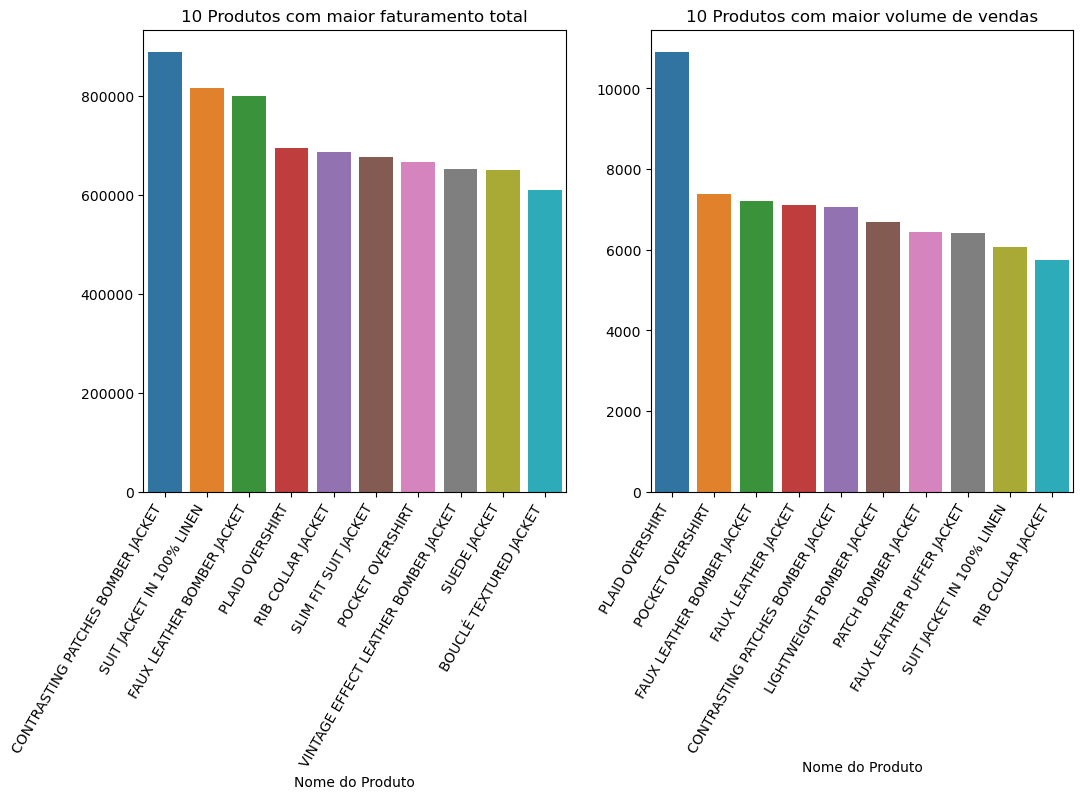

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.barplot(x=top_earning_products.index, y=top_earning_products.values, ax=axs[0])
axs[0].set_xticklabels(top_earning_products.index, rotation=60, ha='right')
axs[0].set_title('10 Produtos com maior faturamento total');
axs[0].set(xlabel='Nome do Produto')

sns.barplot(x=top_sales_products.index, y=top_sales_products.values, ax=axs[1])
axs[1].set_xticklabels(top_sales_products.index, rotation=60, ha='right')
axs[1].set_title('10 Produtos com maior volume de vendas')
axs[1].set(xlabel='Nome do Produto');

Agora vamos para os 10 produtos com menor faturamento e menor volume de vendas:

In [25]:
bottom_earning_products = grouped_products_total_earnings[-10:]
print(f'Percentual dos 10 menores faturamentos: {(bottom_earning_products.sum()/grouped_products_total_earnings.sum()*100):.2f}%')

bottom_sales_products = grouped_products_total_sales[-10:]
print(f'Percentual dos 10 menores volumes de venda: {(bottom_sales_products.sum()/grouped_products_total_sales.sum()*100):.2f}%')

Percentual dos 10 menores faturamentos: 0.61%
Percentual dos 10 menores volumes de venda: 1.33%


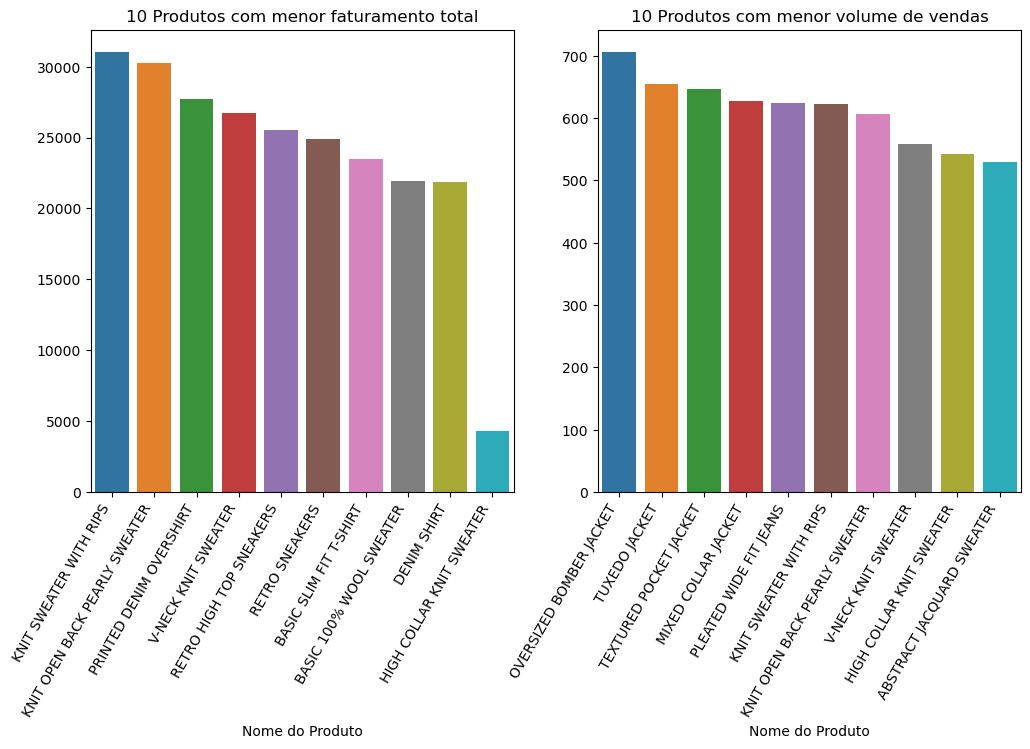

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.barplot(x=bottom_earning_products.index, y=bottom_earning_products.values, ax=axs[0])
axs[0].set_xticklabels(bottom_earning_products.index, rotation=60, ha='right')
axs[0].set_title('10 Produtos com menor faturamento total');
axs[0].set(xlabel='Nome do Produto')

sns.barplot(x=bottom_sales_products.index, y=bottom_sales_products.values, ax=axs[1])
axs[1].set_xticklabels(bottom_sales_products.index, rotation=60, ha='right')
axs[1].set_title('10 Produtos com menor volume de vendas')
axs[1].set(xlabel='Nome do Produto');

Vemos que o produto ***Abstract Jacquard Sweater*** tem o menor volume de vendas, mas não entra na lista dos menores faturamentos. Isso pode indicar uma oportunidade de ganhos maiores, caso o estoque do produto tenha sido menor do que dos outros produtos. 

Vamos focar nossa análise nesse tipo de produto, ou seja, produtos com poucas vendas, mas com faturamento elevado, a fim de encontrar oportunidades de melhoria de vendas e faturamento.

In [27]:
# Grouping tickets by name and total earnings and adding average ticket column
grouped_products_tickets = zara_main.groupby('name')[['sales_volume', 'total_earnings']].sum()
grouped_products_tickets['avg_ticket'] = grouped_products_tickets['total_earnings'] / grouped_products_tickets['sales_volume'] 
grouped_products_tickets.sort_values(by='avg_ticket', ascending=False)

,sales_volume,total_earnings,avg_ticket
name,,,
SUEDE JACKET,1860,649140.00,349.000000
VINTAGE EFFECT LEATHER BOMBER JACKET,2179,651521.00,299.000000
CROPPED LEATHER JACKET,1869,512691.00,274.313002
LEATHER JACKET,2548,511384.20,200.700235
WOOL BLEND TEXTURED JACKET,2366,447174.00,189.000000
...,...,...,...
PURL KNIT SWEATER,2887,37502.13,12.990000
RETRO HIGH TOP SNEAKERS,2556,25534.44,9.990000
RETRO SNEAKERS,2491,24885.09,9.990000


Vamos obter algumas estatísticas desses produtos, como ticket médio e média de vendas, a fim de selecionarmos nossos produtos com maior potencial:

In [32]:
# Getting the mean average ticket considering total earnings / sales volume
grouped_products_tickets_sum = grouped_products_tickets.sum()
mean_avg_ticket = grouped_products_tickets_sum.total_earnings / grouped_products_tickets_sum.sales_volume
print(f'Ticket médio geral: {mean_avg_ticket:.2f}\n')

# Getting the mean of sales volume and total earnings
grouped_products_tickets_mean = grouped_products_tickets.mean()
print(f'Médias gerais:\n{grouped_products_tickets_mean}')

Ticket médio geral: 84.84

Médias gerais:
sales_volume        2356.784615
total_earnings    199940.905026
avg_ticket            81.500965
dtype: float64


Com base nesses dados, vamos considerar que produtos com menos de 1000 vendas (número mais do que 2 vezes menor do que a média geral de vendas) e um ticket médio maior do que US$ 85,00 (o ticket médio geral) podem ser uma ótima oportunidade de aumento das vendas. Vamos selecionar esses produtos:

In [33]:
high_potential_products = grouped_products_tickets[(grouped_products_tickets['sales_volume'] < 1000) & (grouped_products_tickets['avg_ticket'] > 85)].sort_values(by='sales_volume', ascending=False)
high_potential_products

,sales_volume,total_earnings,avg_ticket
name,,,
COTTON - LINEN BLEND JACKET,758,82622.0,109.0
HOUNDSTOOTH SUIT JACKET,730,101470.0,139.0
FLEECE BOMBER JACKET,718,78262.0,109.0
FAUX SUEDE PATCH JACKET,707,63559.3,89.9
OVERSIZED BOMBER JACKET,706,63469.4,89.9
TUXEDO JACKET,654,110526.0,169.0
TEXTURED POCKET JACKET,647,58165.3,89.9
MIXED COLLAR JACKET,628,68452.0,109.0


Caso esses produtos tenham vendido menos de 1000 peças porque tinham poucas peças na loja, ou seja, caso o percentual de vendas tenha sido próximo a 100%, esses podem ser produtos com um bom potencial a ser explorado a fim de aumentar o faturamento da loja sem a necessidade de um aumento expressivo no número de vendas.

Vamos verificar quão benéfico pode ser esse potencial:

In [35]:
total_earnings = grouped_products_tickets.sum().total_earnings
total_sales = grouped_products_tickets.sum().sales_volume
high_potential_mean = high_potential_products.mean()

print('Vendas e faturamento total caso o volume médio de venda seja simplesmente dobrado:')

print(high_potential_mean*8)
sales_increase = (high_potential_mean.sales_volume*8)/total_sales*100
earnings_increase = (high_potential_mean.total_earnings*8)/total_earnings*100

print(f'Aumento percentual nas vendas: {sales_increase:.2f}')
print(f'Aumento percentual no faturamento: {earnings_increase:.2f}')

Vendas e faturamento total caso o volume médio de venda seja simplesmente dobrado:
sales_volume        5548.0
total_earnings    626526.0
avg_ticket           904.7
dtype: float64
Aumento percentual nas vendas: 1.21
Aumento percentual no faturamento: 1.61


Caso o volume médio das vendas desses produtos seja apenas dobrado, teremos um **aumento** no **faturamento** de **US$ 626.526,00**, o que equivale a **1,6% de crescimento**, com apenas 1,2% no aumento das vendas.

In [37]:
total_and_high_potential_mean_sales_ratio = grouped_products_tickets_mean.sales_volume/high_potential_products.mean().sales_volume
print(f'Quantas vezes a média de vendas de todos os produtos é maior do que a média dos produtos de alto potencial: {total_and_high_potential_mean_sales_ratio:.2f}')

optimal_ratio_high_potential_mean = high_potential_mean*8*(total_and_high_potential_mean_sales_ratio - 1)

print(f'Número a mais de vendas: {optimal_ratio_high_potential_mean.sales_volume:.2f}')
print(f'Faturamento a mais: {optimal_ratio_high_potential_mean.total_earnings:.2f}')

print('\nTaxas de aumento de vendas e faturamento, respectivamente:')
print(f'{optimal_ratio_high_potential_mean.sales_volume/total_sales*100:.2f}')
print(f'{optimal_ratio_high_potential_mean.total_earnings/total_earnings*100:.2f}')

Quantas vezes a média de vendas de todos os produtos é maior do que a média dos produtos de alto potencial: 3.40
Número a mais de vendas: 13306.28
Faturamento a mais: 1502654.73

Taxas de aumento de vendas e faturamento, respectivamente:
2.90
3.85


Se conseguirmos elevar a média das vendas desses produtos para a média de vendas total atual (2356), teríamos um **aumento** na média atual das vendas desses produtos de **3,4 vezes**, o que representaria um **aumento** de **2,9% no total das vendas**, com um **aumento** no faturamento de **3,85%** (US$ 1.502.654,73).

É claro que o custo de produção deve ser levado em consideração nesse caso para termos certeza de que esse movimento trará resultados positivos e que não é garantido que com o aumento de disponibilidade, o aumento das vendas será proporcional.

Agora, apenas para termos uma ideia visual da diferença entre as vendas dos menores e dos maiores produtos, vamos pegar os 5 menores faturamentos dos 10 produtos com maior faturamento total e os 5 maiores dos 10 produtos com menor faturamento total:

In [38]:
five_low_top_earning_products = top_earning_products[-5:]
five_upper_bottom_earning_products = bottom_earning_products[0:5]
top_vs_bottom_earning_products = pd.concat([five_low_top_earning_products, five_upper_bottom_earning_products])

five_low_top_sales_products = top_sales_products[-5:]
five_upper_bottom_sales_products = bottom_sales_products[0:5]
top_vs_bottom_sales_products = pd.concat([five_low_top_sales_products, five_upper_bottom_sales_products])

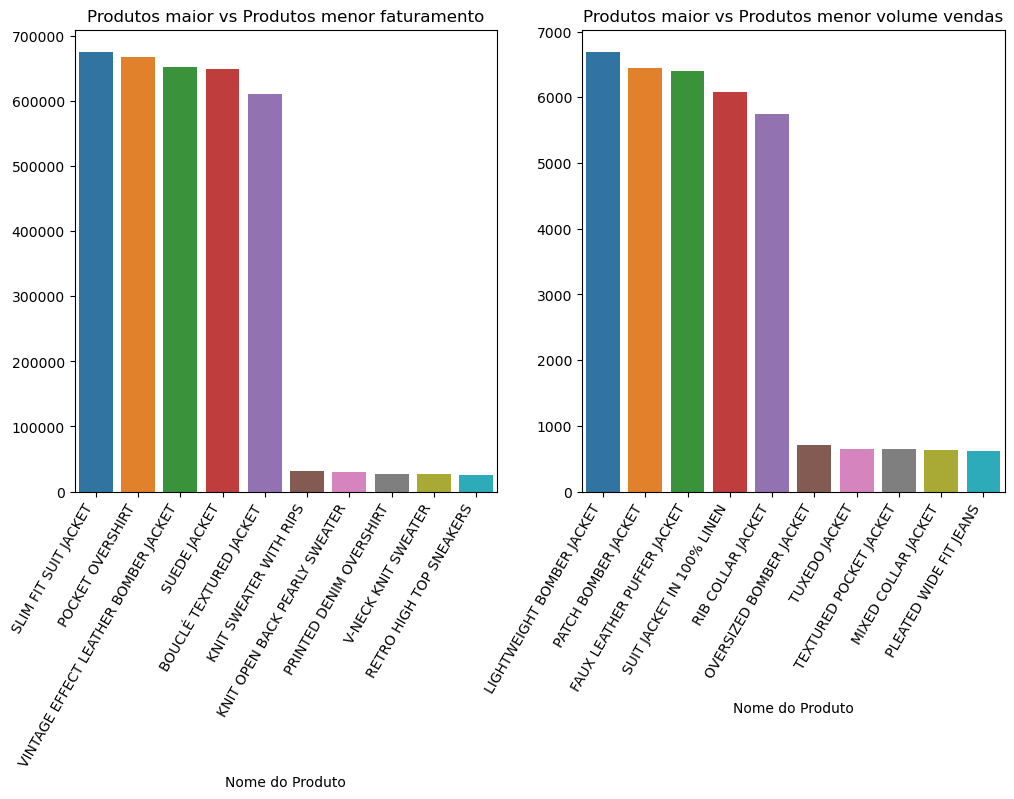

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.barplot(x=top_vs_bottom_earning_products.index, y=top_vs_bottom_earning_products.values, ax=axs[0])
axs[0].set_xticklabels(top_vs_bottom_earning_products.index, rotation=60, ha='right')
axs[0].set_title('Produtos maior vs Produtos menor faturamento');
axs[0].set(xlabel='Nome do Produto')

sns.barplot(x=top_vs_bottom_sales_products.index, y=top_vs_bottom_sales_products.values, ax=axs[1])
axs[1].set_xticklabels(top_vs_bottom_sales_products.index, rotation=60, ha='right')
axs[1].set_title('Produtos maior vs Produtos menor volume vendas');
axs[1].set(xlabel='Nome do Produto');

Vamos agora pegar itens com mesmo nome, para analisarmos se o posicionamento deles possui alguma diferença no volume de vendas e faturamento:

In [42]:
zara_grouped_by_product_name = zara_main.groupby('name').filter(lambda x: len(x) > 1)
zara_grouped_by_product_name.sort_values(['name', 'product_position']).groupby(['name', 'product_position']).head()

,product_id,product_position,promotion,seasonal,sales_volume,url,sku,name,description,price,terms,section,total_earnings
9,137121,Corredor,No,Yes,656,https://www.zara.com/us/en/100-feather-fill-pu...,312372602-800-2,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,169.0,jaquetas,MAN,110864.0
97,120228,Frente do corredor,No,No,2347,https://www.zara.com/us/en/100-feather-fill-pu...,327116625-505-2,100% FEATHER FILL PUFFER JACKET,Puffer vest made of technical fabric. Fill is ...,89.9,jaquetas,MAN,210995.3
199,198283,Frente do corredor,Yes,Yes,1558,https://www.zara.com/us/en/baggy-fit-jeans-p08...,315836999-406-34,BAGGY FIT JEANS,Baggy fit jeans. Five pockets. Washed effect. ...,69.9,jeans,MAN,108904.2
200,141547,Frente do corredor,No,No,1426,https://www.zara.com/us/en/baggy-fit-jeans-p06...,315738965-802-34,BAGGY FIT JEANS,Baggy fit jeans. Five pockets. Washed effect. ...,69.9,jeans,MAN,99677.4
92,146839,Corredor,No,No,1525,https://www.zara.com/us/en/bomber-jacket-p0534...,321496813-710-2,BOMBER JACKET,Jacket with padded interior. Rib elastic colla...,109.0,jaquetas,MAN,166225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,194410,Frente do corredor,No,No,669,https://www.zara.com/us/en/suit-jacket-in-100-...,322972473-052-46,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.0,jaquetas,MAN,106371.0
79,143231,Corredor,No,No,2578,https://www.zara.com/us/en/technical-padded-ja...,311297745-800-2,TECHNICAL PADDED JACKET,Jacket made of technical fabric with padded in...,89.9,jaquetas,MAN,231762.2
75,162883,Frente da loja,Yes,No,786,https://www.zara.com/us/en/technical-padded-ja...,311307584-518-2,TECHNICAL PADDED JACKET,Jacket made of technical fabric with padded in...,139.0,jaquetas,MAN,109254.0
62,135610,Corredor,Yes,Yes,1513,https://www.zara.com/us/en/wool-blend-jacket-p...,321501682-800-2,WOOL BLEND JACKET,Jacket made of wool blend fabric. Lapel collar...,109.0,jaquetas,MAN,164917.0


In [44]:
# Gets the products grouped by name that have more than 1 occurence
main_fields_grouped_by_name = (
    zara_grouped_by_product_name[['name', 'product_position', 'sales_volume', 'total_earnings']]
    .groupby(['name', 'product_position'], as_index=False).agg('sum')
    .groupby('name').filter(lambda x: len(x) > 1)
)
main_fields_grouped_by_name

,name,product_position,sales_volume,total_earnings
0,100% FEATHER FILL PUFFER JACKET,Corredor,656,110864.0
1,100% FEATHER FILL PUFFER JACKET,Frente do corredor,2347,210995.3
3,BOMBER JACKET,Corredor,1525,166225.0
4,BOMBER JACKET,Frente da loja,1590,142941.0
5,BOMBER JACKET,Frente do corredor,1145,124805.0
...,...,...,...,...
73,SUIT JACKET IN 100% LINEN,Frente do corredor,669,106371.0
74,TECHNICAL PADDED JACKET,Corredor,2578,231762.2
75,TECHNICAL PADDED JACKET,Frente da loja,786,109254.0
76,WOOL BLEND JACKET,Corredor,1513,164917.0


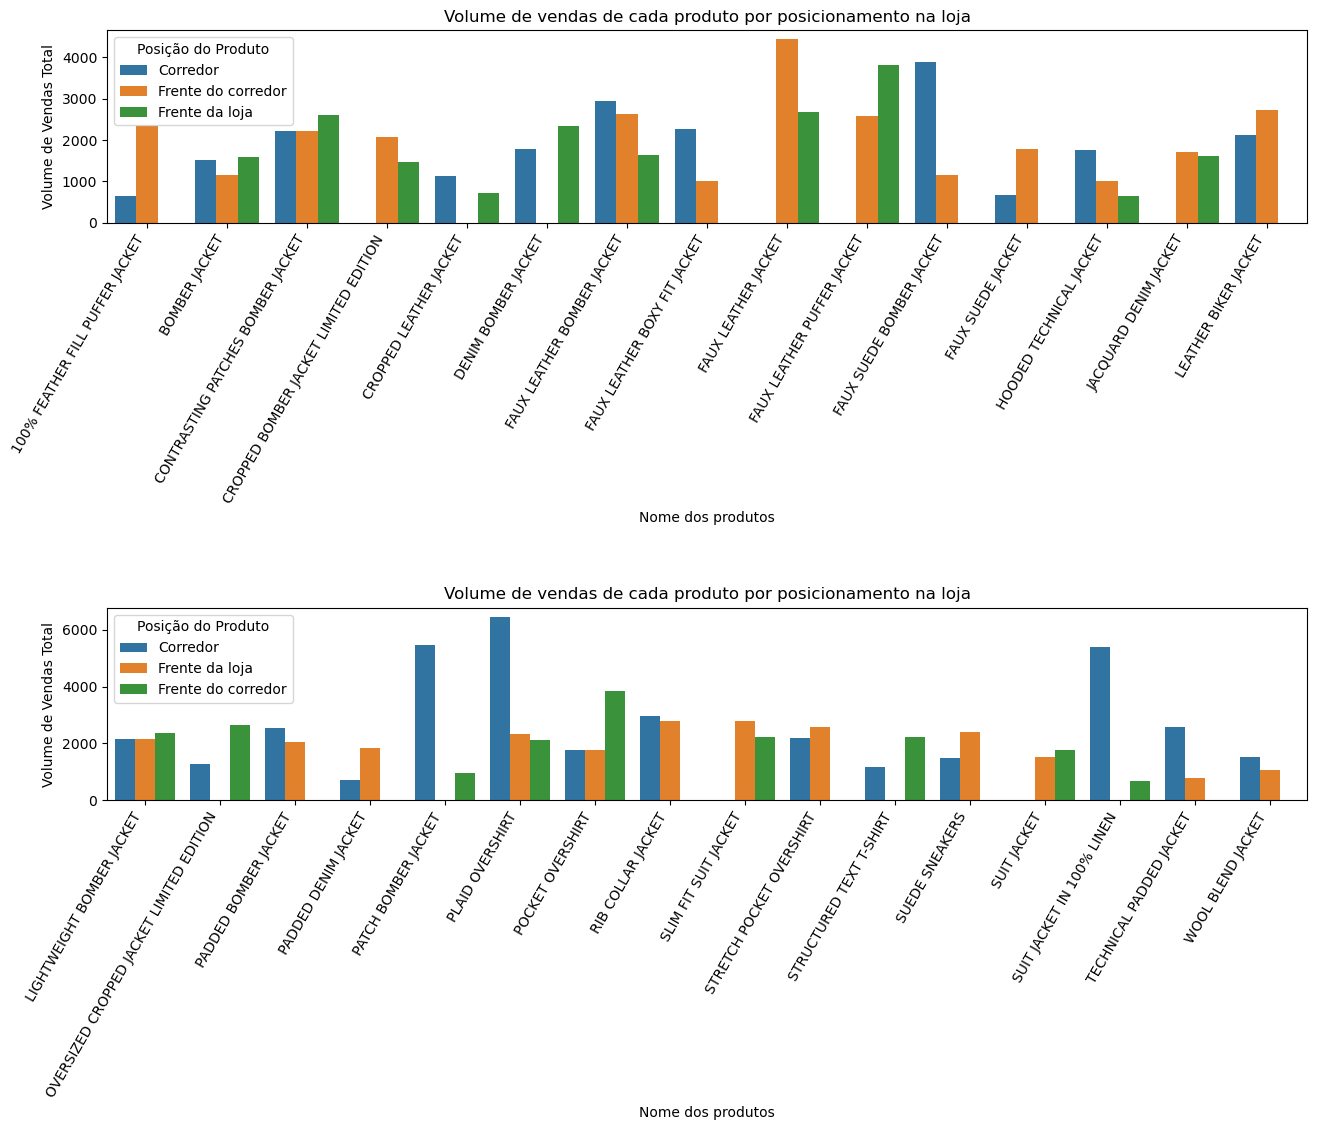

In [69]:
f, ax = plt.subplots(nrows=2, figsize=(15, 10))
plt.subplots_adjust(left=0.1, wspace=0.4,hspace=2)

graph1 = sns.barplot(data=main_fields_grouped_by_name[0:int(np.floor(len(main_fields_grouped_by_name)/2))], x='name', y='sales_volume', hue='product_position', ax=ax[0])
graph2 = sns.barplot(data=main_fields_grouped_by_name[int(np.floor(len(main_fields_grouped_by_name)/2)):], x='name', y='sales_volume', hue='product_position', ax=ax[1])

ax[0].set_xticklabels(graph1.get_xticklabels(), rotation=60, ha='right')
ax[0].set_title('Volume de vendas de cada produto por posicionamento na loja')
ax[0].legend(title='Posição do Produto')
ax[0].set(xlabel='Nome dos produtos', ylabel='Volume de Vendas Total')

ax[1].set_xticklabels(graph2.get_xticklabels(), rotation=60, ha='right')
ax[1].set_title('Volume de vendas de cada produto por posicionamento na loja')
ax[1].legend(title='Posição do Produto')
ax[1].set(xlabel='Nome dos produtos', ylabel='Volume de Vendas Total');

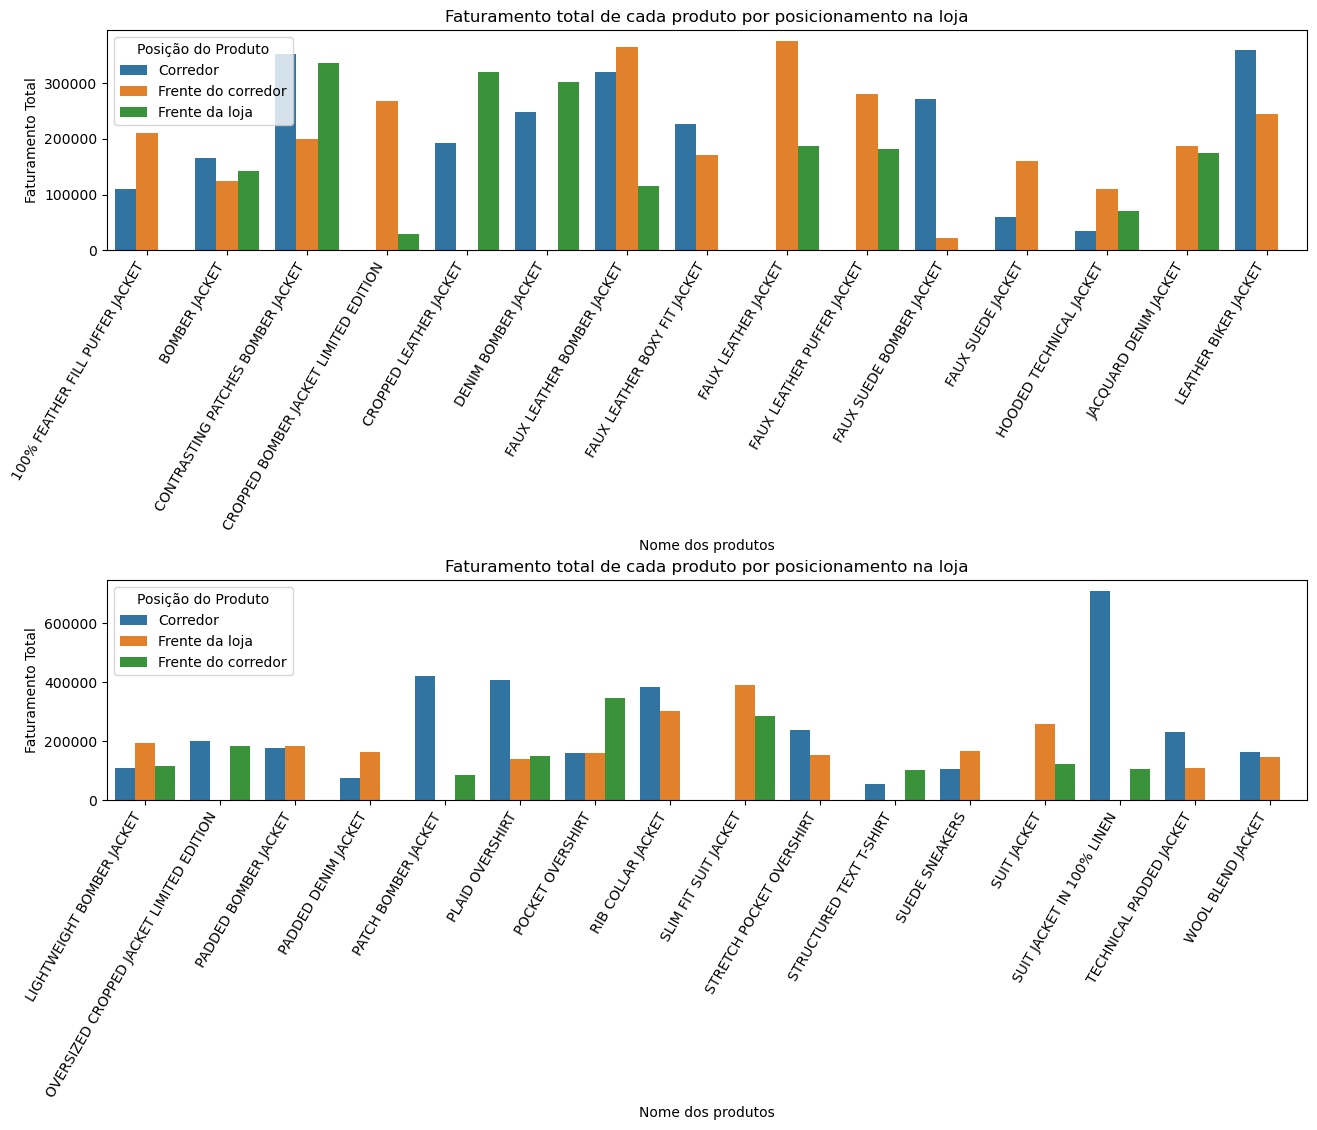

In [68]:
f, ax = plt.subplots(nrows=2, figsize=(15, 10))
plt.subplots_adjust(left=0.1, wspace=0.4,hspace=1.5)

graph1 = sns.barplot(data=main_fields_grouped_by_name[0:int(np.floor(len(main_fields_grouped_by_name)/2))], x='name', y='total_earnings', hue='product_position', ax=ax[0])
graph2 = sns.barplot(data=main_fields_grouped_by_name[int(np.floor(len(main_fields_grouped_by_name)/2)):], x='name', y='total_earnings', hue='product_position', ax=ax[1])

ax[0].set_xticklabels(graph1.get_xticklabels(), rotation=60, ha='right')
ax[0].set_title('Faturamento total de cada produto por posicionamento na loja')
ax[0].legend(title='Posição do Produto')
ax[0].set(xlabel='Nome dos produtos', ylabel='Faturamento Total')

ax[1].set_xticklabels(graph2.get_xticklabels(), rotation=60, ha='right')
ax[1].set_title('Faturamento total de cada produto por posicionamento na loja')
ax[1].legend(title='Posição do Produto')
ax[1].set(xlabel='Nome dos produtos', ylabel='Faturamento Total');

Pode ser interessante visualizar algumas comparações entre 2 posicionamentos de alguns produtos, mas vamos fazer uma análise mais profunda de produtos que possuem todos os 3 posicionamentos possíveis para conseguirmos informações mais específicas sobre eles:

In [59]:
main_fields_grouped_by_name_all_positions = (
    main_fields_grouped_by_name.groupby(['name', 'product_position'], as_index=False).agg('sum')
    .groupby('name').filter(lambda x: len(x) > 2)
)

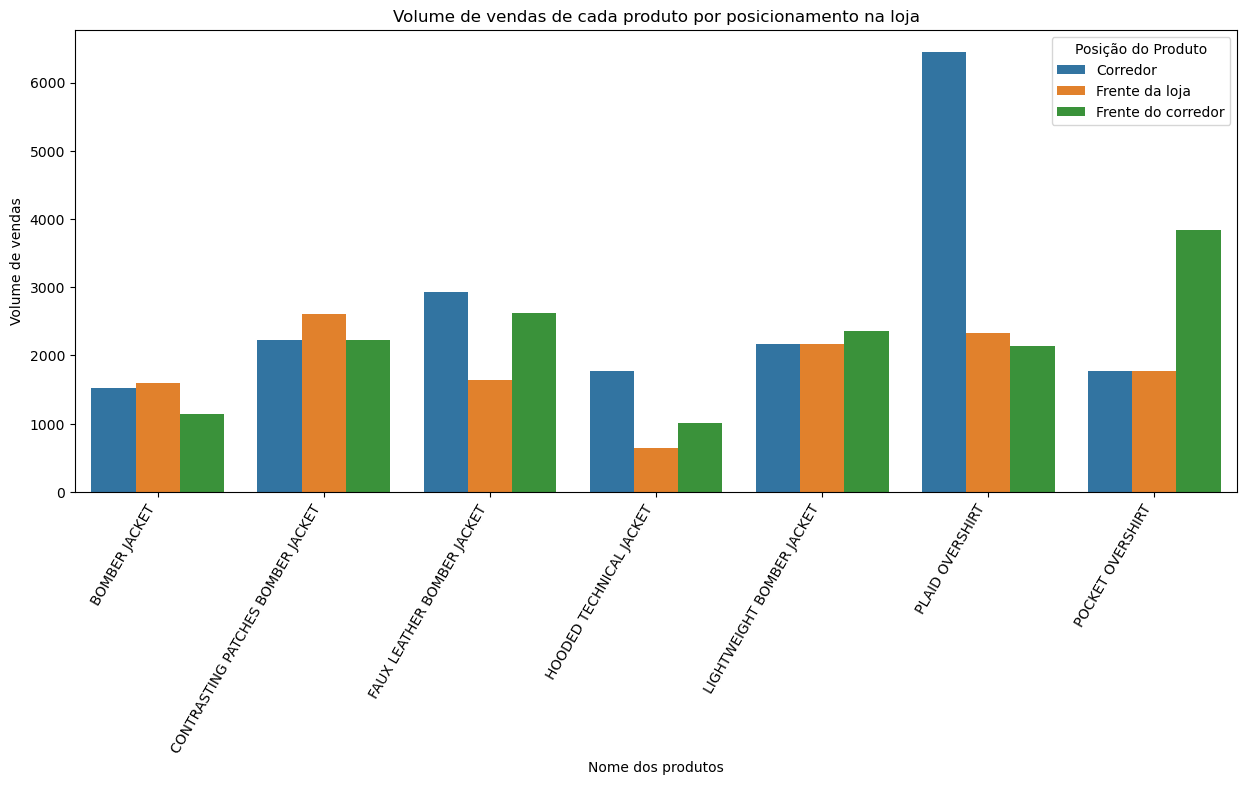

In [67]:
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=main_fields_grouped_by_name_all_positions, x='name', y='sales_volume', hue='product_position')
plt.xticks(rotation=60, ha='right');
plt.title('Volume de vendas de cada produto por posicionamento na loja')
plt.legend(title='Posição do Produto')
ax.set(xlabel='Nome dos produtos', ylabel='Volume de vendas');

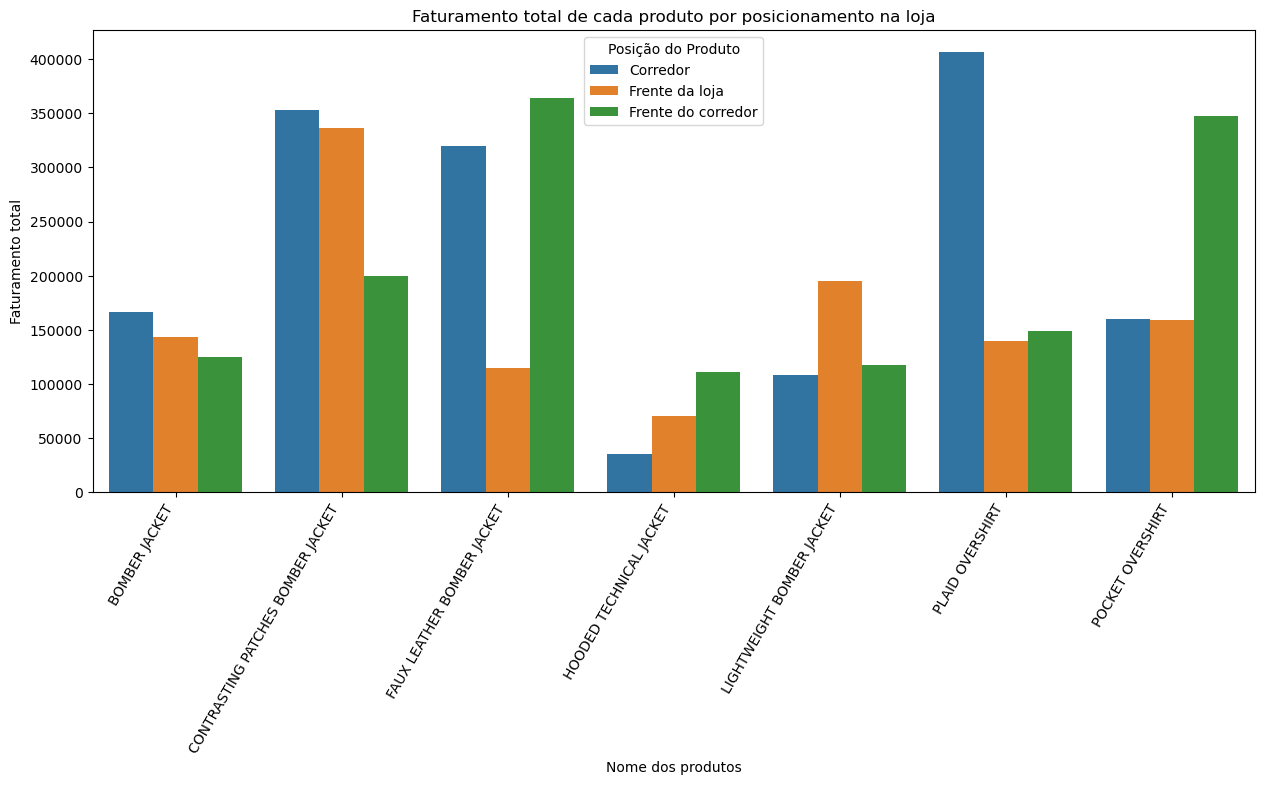

In [72]:
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=main_fields_grouped_by_name_all_positions, x='name', y='total_earnings', hue='product_position')
plt.xticks(rotation=60, ha='right')
plt.title('Faturamento total de cada produto por posicionamento na loja')
plt.legend(title='Posição do Produto')
ax.set(xlabel='Nome dos produtos', ylabel='Faturamento total');

Conseguimos observar que no geral, **não** parece haver uma **diferença** muito significativa no **volume de vendas** dos produtos dependendo da **localização** na loja. No entanto, para o produto ***Plaid Overshirt***, as vendas no **corredor** superam em aproximadamente **3x** as vendas nos outros setores. Algo similar ocorre para a ***Pocket Overshirt***, que possui aproximadamente o **dobro** de vendas na **frente do corredor** quando comparado com os outros dois setores.

Quando comparamos os gráficos de faturamento com volume de vendas, verificamos que para o produto ***Contrasting Patches Bomber Jacket***, apesar de termos uma distribuição parecida no volume de vendas, o faturamento foi **maior** no **corredor** e na **frente da loja** (cerca de 77% e 69% maior), o que implica que mesmo com **valores maiores**, esse produto vendeu praticamente a **mesma quantidade** nesses locais do que na frente do corredor.

Para o produto ***Faux Leather Bomber Jacket***, temos efeito similar, porém em outras localizações: com vendas cerca de **78%** e **59%** maiores nos **corredores** e **frente do corredor**, respectivamente, o **faturamento** foi aproximadamente **3x maior** nesses locais do que na frente da loja.

O produto ***Hooded Technical Jacket*** apresentou vendas aproximadamente **173%** e **74%** maiores no **corredor** do que nos outros locais (frente da loja e frente do corredor, respectivamente), porém um faturamento total **70%** e **50%** menor. Esse é um claro indicativo de posicionamento de produto promocional em local não recomendado.

Por fim, o produto ***Lightweight Bomber Jacket*** apresentou volume similar de vendas em todos os posicionamentos, porém a localização da **frente da loja** rendeu um faturamento aproximadamente **70%** maior do que os outros locais.

Essa análise mostra que não existe uniformidade na distribuição de faturamento e volume de vendas entre os posicionamentos na loja e que eles variam de maneiras distintas conforme o produto analisado. Ou seja, não é possível afirmar que posicionar um produto de certo tipo em determinado local trará mais vendas ou maior faturamento.

No entanto, fica claro que para a maioria dos produtos analisados acima existe sim alguma diferença, principalmente na relação entre volume de vendas e faturamento total. Ou seja, esses dados podem ser utilizados para aumentar o ganho por peça dependendo da posição alocada na loja, considerando os produtos analisados ou até mesmo podendo extrapolar para produtos com certo grau de similaridade.